<!--<img width=700px; src="../img/logoUPSayPlusCDS_990.png"> -->

<p style="margin-top: 3em; margin-bottom: 2em;"><b><big><big><big><big>Introdução ao módulo  Pandas do Python</big></big></big></big></b></p>

In [36]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#pd.options.display.max_rows = 8

# 1. Aquecimento :)

#### Caso 1: dados sobre os sobreviventes do Titanic

In [38]:
df = pd.read_csv("dados/titanic.csv")

In [39]:
df.head()

,PassengeiroId,Sobrevivente,Classe,Nome,Sexo,Idade,Codigo,Documento,Bilhete,Custo,Cabina,Embarcamento
0,1,0,3,"Braund, Mr. Owen Harris",masculino,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",feminino,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",feminino,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",feminino,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",masculino,35.0,0,0,373450,8.0500,NaN,S


Algumas perguntas sobre estes dados nalgumas linhas de código:

**Qual é a distibuição de idades dos passageiros?**

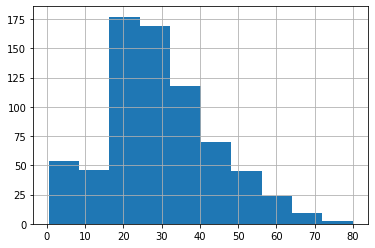

In [40]:
df['Idade'].hist()

**Como varia a taxa de sobrevivência por sexo?**

In [42]:
df.groupby('Sexo')[['Sobrevivente']].aggregate(lambda x: x.sum() / len(x))

,Sobrevivente
Sexo,
feminino,0.742038
masculino,0.188908


**Ou, como difere entre as classes do navio?**

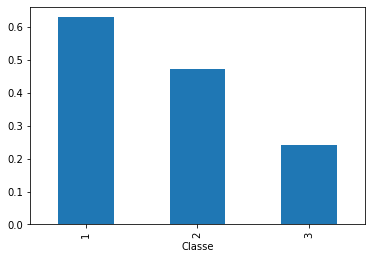

In [46]:
df.groupby('Classe')['Sobrevivente'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

Nota: o códigos destes pequenos exemplos serão explicados neste notebook mais adiante.

#### Caso 2: Série temporal da qualidade do ar

AirBase (The European Air quality dataBase): medições horárias de todas as estações europeias de monitorização da qualidade do ar

Abrir o ficheiro com uma amostra para diferentes estações:

In [50]:
dados = pd.read_csv('dados/20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'], index_col=0, parse_dates=True)

In [51]:
dados.head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
2000-01-01 05:00:00,79.0,52.0,64.0,28.0


**Existe uma tendência decrescente da qualidade do ar ao longo dos anos?**

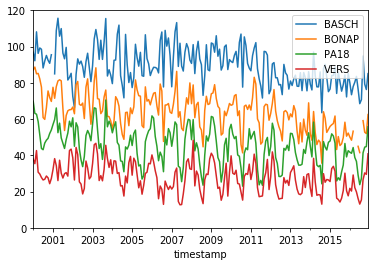

In [52]:
dados['1999':].resample('M').mean().plot(ylim=[0,120])

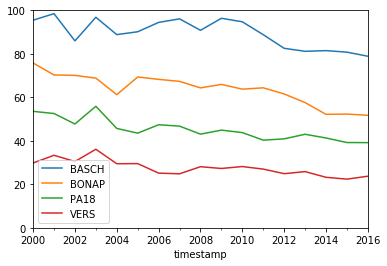

In [58]:
dados['1999':].resample('A').mean().plot(ylim=[0,100])

**Qual é a diferença de perfil diurno entre dias da semana e fins de semana?**

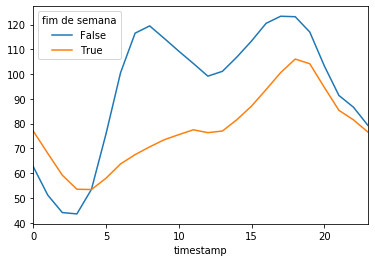

In [55]:
data['semana'] = data.index.weekday
data['fim de semana'] = data['semana'].isin([5, 6])
data_weekend = data.groupby(['fim de semana', data.index.hour])['BASCH'].mean().unstack(level=0)
data_weekend.plot()

# 2. Pandas: análise de dados em python

O módulo Python Pandas [Pandas](http://pandas.pydata.org) é fundamental para trabalhar com grandes volumes de dados estruturados.

O que é o módulo 'pandas'?

Pandas DataFrame é uma estrutura de dados tabular bidimensional, mutável em tamanho e potencialmente heterogénea, com eixos rotulados (linhas e colunas). Uma DataFrame é uma estrutura de dados bidimensional, isto é, os dados são alinhados de forma tabular em linhas e colunas. O Pandas DataFrame consiste em três componentes principais, os dados, linhas e colunas.

* Pandas pode ser interpretado como *arrays NymPy com etiquetas* para linhas e colunas, com melhor suporte para tipos de dados heterógeneos; mas é muito, muito mais que isto
* Também pode ser considerado o equivalente a  `data.frame` em 'R' .
* Poderoso para trabalhar com dados em falta, séries temporais, ler e escrever dados, redimensionar, agrupar e associar dados, etc.

Documentação: http://pandas.pydata.org/pandas-docs/stable/


** Quando é necessário utilizar pandas? **

Quando se trabalha com **dados tabulares ou estruturados** (como um dataframe R, uma tabela de um SGBDR, folha Excel...):

- Importar dados
- Limpar dados 
- Explorar dados, ganhar conhecimento sobre os dados
- Processar e preparar os dados para análise
- Analisar os dados (conjuntamente com scikit-learn, modelos estatísticos, ...)

<div class="alert alert-warning">
<b>ATENÇÃO!</b>: <br><br>

Pandas é ótimo para trabalhar com dados heterogéneos e tabulares (1D/2D) data, mas nem todos os dados se encaixam nestas estruturas!
<ul>
<li>Quando se trabalha com dados em array (p.ex. imagens, algoritmos numéricos: utilizar numpy</li>
<li>Quando tiver dados multidimensionais com etiquetas (p.ex. dados climáticos): veja [xarray](http://xarray.pydata.org/en/stable/)</li>
</ul>
</div>

# 2. As estruturas de dados pandas : `DataFrame` e `Series`

A `DataFrame` is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.

Um `DataFrame` é uma ** estrutura de dados tabular ** (objeto multidimensional para armazenar dados rotulados) composta de linhas e colunas, semelhante a uma folha Excel, tabela de base de dados relacional ou data.frame de R. Pode interpretar como como vários objetos do tipo Series que compartilham o mesmo índice.

<img align="left" width=50% src="pandas-dataframe_series.png">

Vamos agora abrir um ficheiro com alguns dados sobre contratos públicos (extraídos do portal Base - http://www.base.gov.pt/Base/pt/Homepage).
O docente explicará a metodologia na aula.

In [77]:
low_memory=False;
contratos=pd.read_csv("dados/contratos.csv")

In [78]:
contratos

,concelho,contrato,entidade_adjudicante,entidade_adjudicataria,tipo_contrato,tipo_procedimento,cpv,data_publicacao,descricao,fundamentacao,fundamentacao_ajuste_direto,objeto_contrato,data_contrato,preco_contratual,prazo_execucao,anuncio,data_fecho_contrato,preco_total_efetivo
0,Abrantes,1391442,503148776,680017542,Aquisição de serviços,Ajuste directo,Serviços de distribuição de água e serviços co...,2015-02-26,3400007076,"Artigo 24.º, n.º 1, alínea e) do Código dos Co...",ausência de recursos próprios,FORNECIMENTO DE ÁGUA PARA O ACES MÉDIO TEJO - ...,2015-02-25,41380.85,365,NaN,NaN,NaN
1,Abrantes,129439,502661038,503123919,Aquisição de bens móveis,Ajuste directo,Cartuchos de tinta (toner),2010-02-17,Aquisição de tinteiros para máquina XEROX8265,"Artigo 20.º, n.º 1, alínea a) do Código dos Co...",Não aplicável,Aquisição de Tinteiros para máquina XEROX 8265,2010-02-17,5800.00,300,NaN,NaN,NaN
2,Abrantes,453967,680017542,508230772,Aquisição de bens móveis,Ajuste directo,Materiais para canalização,2012-02-08,Material diverso para armazém,"Artigo 20.º, n.º 1, alínea a) do Código dos Co...",ausência de recursos próprios,Aquisição de material diverso para armazém,2012-02-02,50552.30,15,NaN,2012-04-13,50552.30
3,Abrantes,520079,502661038,247710911,Aquisição de serviços,Ajuste directo,"Serviços recreativos, culturais e desportivos",2012-06-01,Contrato de Aquisição de serviços na área de a...,"Artigo 20.º, n.º 1, alínea a) do Código dos Co...",ausência de recursos próprios,Aquisição de serviços na área de animaçao cult...,2012-05-31,13000.08,365,NaN,NaN,NaN
4,Abrantes,442129,502661038,502613475,Aquisição de bens móveis,Ajuste directo,Sinais,2012-01-06,Contrato de aquisiçao de sinalização vertical,"Artigo 20.º, n.º 1, alínea a) do Código dos Co...",Não aplicável,Contrato de aquisiçao de sinalização vertical,2012-01-04,35757.21,1095,NaN,2013-01-21,24163.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745107,Óbidos,1133092,506802698,503504564,Aquisição de serviços,Concurso público,Serviços de distribuição de electricidade e se...,2014-07-28,Contrato nº. 20/2014 - Fornecimento de Energia...,"Artigo 20.º, n.º 1, alínea b) do Código dos Co...",Não aplicável,Fornecimento de Energia Elétrica para as Insta...,2014-06-17,192000.00,365,http://www.base.gov.pt/Base/pt/Pesquisa/Anunci...,NaN,NaN
745108,Óbidos,1133092,506802698,503504564,Aquisição de serviços,Concurso público,Serviços de distribuição de electricidade e se...,2014-07-28,Contrato nº. 20/2014 - Fornecimento de Energia...,"Artigo 20.º, n.º 1, alínea b) do Código dos Co...",Não aplicável,Fornecimento de Energia Elétrica para as Insta...,2014-06-17,192000.00,365,http://www.base.gov.pt/Base/pt/Pesquisa/Anunci...,NaN,NaN
745109,Óbidos,155981,506802698,504083279,Aquisição de bens móveis,Ajuste directo,"Máquinas, equipamento e material de escritório...",2010-05-20,Fornecimento em contínuo de Consumíveis de Inf...,"Artigo 20.º, n.º 1, alínea a) do Código dos Co...",Não aplicável,Fornecimento em contínuo de Consumíveis de Inf...,2010-05-20,35000.00,365,NaN,2011-12-29,17203.05
745110,Óbidos,1645113,506802698,504758454,Aquisição de bens móveis,Ajuste directo,Equipamento e material informático,2015-10-07,RED 828_2015 -Fornecimento e Instalação de Har...,"Artigo 20.º, n.º 1, alínea a) do Código dos Co...",ausência de recursos próprios,Fornecimento e Instalação de Hardware (Quiosqu...,2015-09-29,6639.00,15,NaN,2015-09-29,6639.00


### Atributos de um DataFrame

Um dataframe, além do atributo `index`, tem um atributo `columns`:

In [79]:
contratos.index

RangeIndex(start=0, stop=745112, step=1)

In [82]:
contratos.columns

Index(['concelho', 'contrato', 'entidade_adjudicante',
       'entidade_adjudicataria', 'tipo_contrato', 'tipo_procedimento', 'cpv',
       'data_publicacao', 'descricao', 'fundamentacao',
       'fundamentacao_ajuste_direto', 'objeto_contrato', 'data_contrato',
       'preco_contratual', 'prazo_execucao', 'anuncio', 'data_fecho_contrato',
       'preco_total_efetivo'],
      dtype='object')

Para verificar os tipos de dados das colunas::

In [81]:
contratos.dtypes

concelho                        object
contrato                         int64
entidade_adjudicante            object
entidade_adjudicataria          object
tipo_contrato                   object
tipo_procedimento               object
cpv                             object
data_publicacao                 object
descricao                       object
fundamentacao                   object
fundamentacao_ajuste_direto     object
objeto_contrato                 object
data_contrato                   object
preco_contratual               float64
prazo_execucao                   int64
anuncio                         object
data_fecho_contrato             object
preco_total_efetivo            float64
dtype: object

Informação providenciada pelo método info():

In [84]:
contratos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745112 entries, 0 to 745111
Data columns (total 18 columns):
concelho                       745112 non-null object
contrato                       745112 non-null int64
entidade_adjudicante           745112 non-null object
entidade_adjudicataria         745112 non-null object
tipo_contrato                  745112 non-null object
tipo_procedimento              745112 non-null object
cpv                            745112 non-null object
data_publicacao                745112 non-null object
descricao                      738770 non-null object
fundamentacao                  745112 non-null object
fundamentacao_ajuste_direto    745102 non-null object
objeto_contrato                745112 non-null object
data_contrato                  745112 non-null object
preco_contratual               745112 non-null float64
prazo_execucao                 745112 non-null int64
anuncio                        61512 non-null object
data_fecho_contrato        

Além de importar os dados de uma fonte externa (arquivo de texto, excel, base de dados, etc.), uma das maneiras mais comuns de criar um dataframe é a partir de um dicionário de arrays ou listas.

Observe que num notebook IPython, o dataframe será exibido numa "vista" HTML :

In [63]:
data = {'pais': ['Bélgica', 'Françq', 'Alemanha', 'Holanda', 'Inglaterra'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Bruxelas', 'Paris', 'Berlim', 'Amesterdão', 'Londres']}
df_countries = pd.DataFrame(data)
df_countries

,pais,population,area,capital
0,Bélgica,11.3,30510,Bruxelas
1,Françq,64.3,671308,Paris
2,Alemanha,81.3,357050,Berlim
3,Holanda,16.9,41526,Amesterdão
4,Inglaterra,64.9,244820,Londres


### dados unidimensionais : `Series` (uma coluna de um DataFrame)

In [87]:
contratos['contrato']

0         1391442
1          129439
2          453967
3          520079
4          442129
           ...   
745107    1133092
745108    1133092
745109     155981
745110    1645113
745111    1645113
Name: contrato, Length: 745112, dtype: int64

In [95]:
num_contrato = contratos['contrato']
num_contrato

0         1391442
1          129439
2          453967
3          520079
4          442129
           ...   
745107    1133092
745108    1133092
745109     155981
745110    1645113
745111    1645113
Name: contrato, Length: 745112, dtype: int64

### Atributos de Series: `index` e `values`

Uma Series também tem os atributos `index` e `values`, mas não `columns`

In [97]:
num_contrato.index

RangeIndex(start=0, stop=745112, step=1)

Pode aceder à representação do array numpy subjacente com o atributo`.values`:

In [99]:
num_contrato.values[:50]

array([1391442,  129439,  453967,  520079,  442129,  107936,  107936,
        122380,  515632,  117692,  107936,  646102, 1391442,  107936,
        801859,  205619, 1099264,  899415,  325081,  783980, 2044745,
       2181098,  783980,  912635,  880263,  783980,  783980,  783980,
        228791, 1413968, 1286128,  121969,   66736, 2043613,  575492,
        971745, 2147070,  221314, 1068659,  575492, 1063761, 1509971,
       1126311, 2012541,  769456, 2163623, 1449566, 2049994,  883184,
       1174963])

Pode aceder aos avores via índice, como nos aeeays NumPy:

In [100]:
num_contrato[1]

129439

Em Pandas, contrariamente a NumPy array, o índice pode ser outro tipo de dados que não inteiro:

In [101]:
contratos = contratos.set_index('concelho')
contratos

,contrato,entidade_adjudicante,entidade_adjudicataria,tipo_contrato,tipo_procedimento,cpv,data_publicacao,descricao,fundamentacao,fundamentacao_ajuste_direto,objeto_contrato,data_contrato,preco_contratual,prazo_execucao,anuncio,data_fecho_contrato,preco_total_efetivo
concelho,,,,,,,,,,,,,,,,,
Abrantes,1391442,503148776,680017542,Aquisição de serviços,Ajuste directo,Serviços de distribuição de água e serviços co...,2015-02-26,3400007076,"Artigo 24.º, n.º 1, alínea e) do Código dos Co...",ausência de recursos próprios,FORNECIMENTO DE ÁGUA PARA O ACES MÉDIO TEJO - ...,2015-02-25,41380.85,365,NaN,NaN,NaN
Abrantes,129439,502661038,503123919,Aquisição de bens móveis,Ajuste directo,Cartuchos de tinta (toner),2010-02-17,Aquisição de tinteiros para máquina XEROX8265,"Artigo 20.º, n.º 1, alínea a) do Código dos Co...",Não aplicável,Aquisição de Tinteiros para máquina XEROX 8265,2010-02-17,5800.00,300,NaN,NaN,NaN
Abrantes,453967,680017542,508230772,Aquisição de bens móveis,Ajuste directo,Materiais para canalização,2012-02-08,Material diverso para armazém,"Artigo 20.º, n.º 1, alínea a) do Código dos Co...",ausência de recursos próprios,Aquisição de material diverso para armazém,2012-02-02,50552.30,15,NaN,2012-04-13,50552.30
Abrantes,520079,502661038,247710911,Aquisição de serviços,Ajuste directo,"Serviços recreativos, culturais e desportivos",2012-06-01,Contrato de Aquisição de serviços na área de a...,"Artigo 20.º, n.º 1, alínea a) do Código dos Co...",ausência de recursos próprios,Aquisição de serviços na área de animaçao cult...,2012-05-31,13000.08,365,NaN,NaN,NaN
Abrantes,442129,502661038,502613475,Aquisição de bens móveis,Ajuste directo,Sinais,2012-01-06,Contrato de aquisiçao de sinalização vertical,"Artigo 20.º, n.º 1, alínea a) do Código dos Co...",Não aplicável,Contrato de aquisiçao de sinalização vertical,2012-01-04,35757.21,1095,NaN,2013-01-21,24163.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Óbidos,1133092,506802698,503504564,Aquisição de serviços,Concurso público,Serviços de distribuição de electricidade e se...,2014-07-28,Contrato nº. 20/2014 - Fornecimento de Energia...,"Artigo 20.º, n.º 1, alínea b) do Código dos Co...",Não aplicável,Fornecimento de Energia Elétrica para as Insta...,2014-06-17,192000.00,365,http://www.base.gov.pt/Base/pt/Pesquisa/Anunci...,NaN,NaN
Óbidos,1133092,506802698,503504564,Aquisição de serviços,Concurso público,Serviços de distribuição de electricidade e se...,2014-07-28,Contrato nº. 20/2014 - Fornecimento de Energia...,"Artigo 20.º, n.º 1, alínea b) do Código dos Co...",Não aplicável,Fornecimento de Energia Elétrica para as Insta...,2014-06-17,192000.00,365,http://www.base.gov.pt/Base/pt/Pesquisa/Anunci...,NaN,NaN
Óbidos,155981,506802698,504083279,Aquisição de bens móveis,Ajuste directo,"Máquinas, equipamento e material de escritório...",2010-05-20,Fornecimento em contínuo de Consumíveis de Inf...,"Artigo 20.º, n.º 1, alínea a) do Código dos Co...",Não aplicável,Fornecimento em contínuo de Consumíveis de Inf...,2010-05-20,35000.00,365,NaN,2011-12-29,17203.05


In [103]:
entadce = contratos['entidade_adjudicante']
entadce

concelho
Abrantes    503148776
Abrantes    502661038
Abrantes    680017542
Abrantes    502661038
Abrantes    502661038
              ...    
Óbidos      506802698
Óbidos      506802698
Óbidos      506802698
Óbidos      506802698
Óbidos      506802698
Name: entidade_adjudicante, Length: 745112, dtype: object

In [109]:
preco = contratos['preco_contratual']
preco

concelho
Abrantes     41380.85
Abrantes      5800.00
Abrantes     50552.30
Abrantes     13000.08
Abrantes     35757.21
              ...    
Óbidos      192000.00
Óbidos      192000.00
Óbidos       35000.00
Óbidos        6639.00
Óbidos        6639.00
Name: preco_contratual, Length: 745112, dtype: float64

In [110]:
preco * 1000

concelho
Abrantes     41380850.0
Abrantes      5800000.0
Abrantes     50552300.0
Abrantes     13000080.0
Abrantes     35757210.0
               ...     
Óbidos      192000000.0
Óbidos      192000000.0
Óbidos       35000000.0
Óbidos        6639000.0
Óbidos        6639000.0
Name: preco_contratual, Length: 745112, dtype: float64

Uma grande gama de métodos:

In [111]:
preco.mean()

97463.42194963981

In [112]:
preco[preco > 5000]

concelho
Abrantes     41380.85
Abrantes      5800.00
Abrantes     50552.30
Abrantes     13000.08
Abrantes     35757.21
              ...    
Óbidos      192000.00
Óbidos      192000.00
Óbidos       35000.00
Óbidos        6639.00
Óbidos        6639.00
Name: preco_contratual, Length: 520151, dtype: float64

But also a lot of pandas specific methods, e.g.

In [113]:
contratos['entidade_adjudicante'].value_counts()

508142156    19230
503148776    16536
501427511    16195
510745997    16000
600010686     8804
             ...  
506724530        1
506764508        1
512007357        1
600084523        1
505020408        1
Name: entidade_adjudicante, Length: 7883, dtype: int64

<div class="alert alert-success">

<b>EXERCÍCIO</b>:

 <ul>
  <li>Qual o valor do maior contrato? E a mediana?</li>
</ul>
</div>

# 3. Importar e exportar dados

Suporte nativo a uma gama muito variada de formatos (input/output):

* CSV, text
* basee de dados SQL
* Excel
* HDF5
* json
* html
* pickle
* sas, stata
* (parquet)
* ...

In [ ]:
#pd.read

In [ ]:
#df.to

Leitor csv muito poderoso:

In [116]:
pd.read_csv?

Se o csv for bem formatado, não são necessários muitos desses argumentos...):

In [117]:
df = pd.read_csv("dados/titanic.csv")

In [119]:
df.head(2)

,PassengeiroId,Sobrevivente,Classe,Nome,Sexo,Idade,Codigo,Documento,Bilhete,Custo,Cabina,Embarcamento
0,1,0,3,"Braund, Mr. Owen Harris",masculino,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",feminino,38.0,1,0,PC 17599,71.2833,C85,C


<div class="alert alert-success">

<b>EXERCÍCIO</b>: tente ler o ficheiro '20000101_20161231-NO2.csv' para uma DataFrame denominada 'no2'
<br><br>
Alguns considerandos sobre o ficheiro:
 <ul>
  <li>Que separador é utilizado no ficheiro?</li>
  <li>A segunda linha inclui informação sobre unidades e não deve ser incluída no carregamento (verifique o argumento 'skiprows')</li>
  <li>os dados em falta (missing values) têm a notação'n/d'(verifique o argumento'na_values' )</li>
  <li>Pretende fazer a transformação (parse) da coluna 'timestamp' para tipo de dados datetime (verifique o argumento 'parse_dates' )</li>
</ul>
</div>

In [120]:
no2 = pd.read_csv('dados/20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'], index_col=0, parse_dates=True)

In [121]:
no2

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
2000-01-01 05:00:00,79.0,52.0,64.0,28.0
...,...,...,...,...
2016-12-31 19:00:00,77.0,49.0,52.0,23.0
2016-12-31 20:00:00,73.0,51.0,49.0,20.0
2016-12-31 21:00:00,61.0,51.0,48.0,16.0


# 4. Exploração

Algums métodos úteis:

`head` e `tail`

In [122]:
no2.head(3)

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0


In [123]:
no2.tail()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2016-12-31 19:00:00,77.0,49.0,52.0,23.0
2016-12-31 20:00:00,73.0,51.0,49.0,20.0
2016-12-31 21:00:00,61.0,51.0,48.0,16.0
2016-12-31 22:00:00,57.0,49.0,45.0,14.0
2016-12-31 23:00:00,51.0,47.0,45.0,12.0


`info()`

In [124]:
no2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149039 entries, 2000-01-01 01:00:00 to 2016-12-31 23:00:00
Data columns (total 4 columns):
BASCH    139949 non-null float64
BONAP    136493 non-null float64
PA18     142259 non-null float64
VERS     143813 non-null float64
dtypes: float64(4)
memory usage: 5.7 MB


Obter um sumário básico das estatísticas com `describe`:

In [129]:
no2.describe()

,BASCH,BONAP,PA18,VERS
count,139949.000000,136493.000000,142259.000000,143813.000000
mean,89.270098,64.001714,45.104211,27.613227
std,36.772855,27.866767,23.212719,19.604953
min,4.000000,0.000000,2.000000,0.000000
25%,63.000000,44.000000,28.000000,13.000000
50%,87.000000,62.000000,42.000000,22.000000
75%,112.000000,81.000000,59.000000,38.000000
max,358.000000,345.000000,306.000000,197.000000


Visualização rápida dos dados:

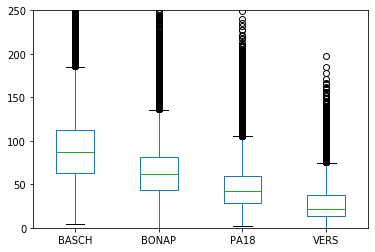

In [126]:
no2.plot(kind='box', ylim=[0,250])

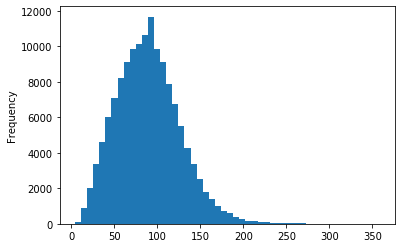

In [127]:
no2['BASCH'].plot(kind='hist', bins=50)

<div class="alert alert-success">

<b>EXERCÍCIO</b>: 

 <ul>
  <li>Apresente o histograma das idades dos passageiros do titanic</li>
</ul>
</div>

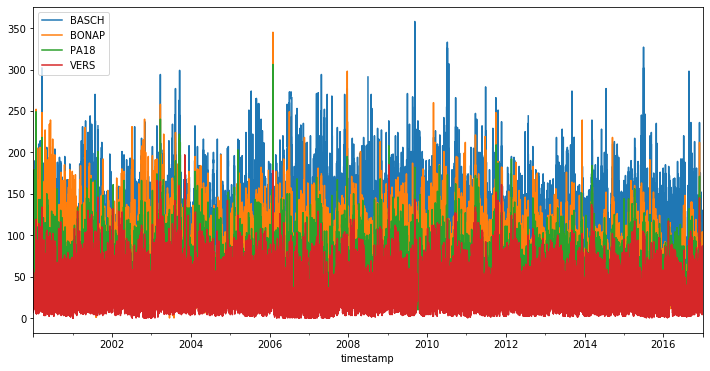

In [128]:
no2.plot(figsize=(12,6))

Isto não diz muito...

Poderá selecionar parte dos dados (p.ex. os últimos 500 pontos):

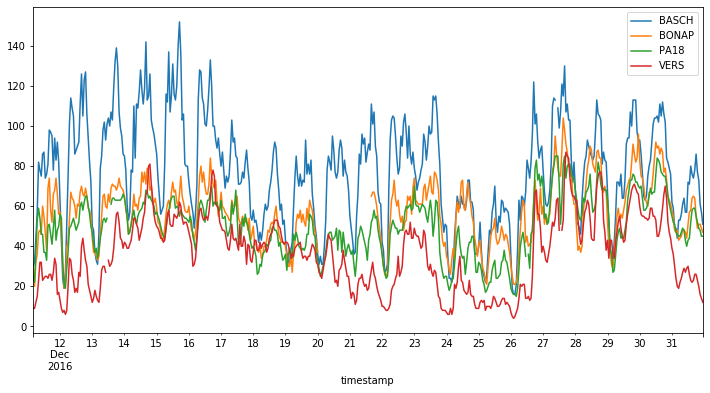

In [132]:
no2[-500:].plot(figsize=(12,6))

# 5. Selecionar e filtrar dados

<div class="alert alert-warning">
<b>ATENÇÃO!</b>: <br><br>

Uma das One of pandas' basic features is the labeling of rows and columns, but this makes indexing also a bit more complex compared to numpy. <br><br> We now have to distuinguish between:

 <ul>
  <li>selection by **label**</li>
  <li>selection by **position**</li>
</ul>
</div>

In [134]:
df = pd.read_csv("titanic.csv")

### `df[]` providencia alguns atalhos convenientes 

Para um DataFrame, basic indexação básica seleciona as colunas.

Seleção de uma única coluna:

In [136]:
df['Idade']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Idade, Length: 891, dtype: float64

ou multiplas colunas:

In [139]:
df[['Idade', 'Custo']]

,Idade,Custo
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


Mas, "slicing" acede às linhas:

In [140]:
df[10:15]

,PassengeiroId,Sobrevivente,Classe,Nome,Sexo,Idade,Codigo,Documento,Bilhete,Custo,Cabina,Embarcamento
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",feminino,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",feminino,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",masculino,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",masculino,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",feminino,14.0,0,0,350406,7.8542,NaN,S


### Indexação sistemática com  `loc` e `iloc`

Quando se utiliza `[]` como acima só poderá selecionar a partir de um eixo de cada vez (linhas ou colunas, não ambas). Para indexação mais avançada, é necessário utilizae outros métodos:
    
* `loc`: seleção por etiqueta
* `iloc`: seleção by posição

In [144]:
df = df.set_index('Nome')

In [146]:
df.loc['Bonnell, Miss. Elizabeth', 'Custo']

26.55

In [147]:
df.loc['Bonnell, Miss. Elizabeth':'Andersson, Mr. Anders Johan', :]

,PassengeiroId,Sobrevivente,Classe,Sexo,Idade,Codigo,Documento,Bilhete,Custo,Cabina,Embarcamento
Nome,,,,,,,,,,,
"Bonnell, Miss. Elizabeth",12,1,1,feminino,58.0,0,0,113783,26.550,C103,S
"Saundercock, Mr. William Henry",13,0,3,masculino,20.0,0,0,A/5. 2151,8.050,NaN,S
"Andersson, Mr. Anders Johan",14,0,3,masculino,39.0,1,5,347082,31.275,NaN,S


Selecionando por posição com  `iloc` funciona de forma similar à indexação em arrays numpy :

In [148]:
df.iloc[0:2,1:3]

,Sobrevivente,Classe
Nome,,
"Braund, Mr. Owen Harris",0,3
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1


Estes métodos também podem ser utilizados para alterar/atribuir valores:

In [152]:
df.loc['Braund, Mr. Owen Harris', 'Sobrevivente'] = 100

In [153]:
df

,PassengeiroId,Sobrevivente,Classe,Sexo,Idade,Codigo,Documento,Bilhete,Custo,Cabina,Embarcamento,Survived
Nome,,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,100,3,masculino,22.0,1,0,A/5 21171,7.2500,NaN,S,100.0
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,feminino,38.0,1,0,PC 17599,71.2833,C85,C,NaN
"Heikkinen, Miss. Laina",3,1,3,feminino,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,feminino,35.0,1,0,113803,53.1000,C123,S,NaN
"Allen, Mr. William Henry",5,0,3,masculino,35.0,0,0,373450,8.0500,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",887,0,2,masculino,27.0,0,0,211536,13.0000,NaN,S,NaN
"Graham, Miss. Margaret Edith",888,1,1,feminino,19.0,0,0,112053,30.0000,B42,S,NaN
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,feminino,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN


### Indexação Booleana (filtragem)

Frequentemente pretende-se selecionar linhas com base numa determinada condição. Isso pode ser feito com 'indexação booleana' (como uma cláusula WHERE na linguagem SQL) e comparável a numpy.

O indexador (ou máscara booleana) deve ser unidimensional.

In [142]:
df['Custo'] > 50

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Custo, Length: 891, dtype: bool

In [143]:
df[df['Custo'] > 50]

,PassengeiroId,Sobrevivente,Classe,Nome,Sexo,Idade,Codigo,Documento,Bilhete,Custo,Cabina,Embarcamento
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",feminino,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",feminino,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",masculino,54.0,0,0,17463,51.8625,E46,S
27,28,0,1,"Fortune, Mr. Charles Alexander",masculino,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",feminino,NaN,1,0,PC 17569,146.5208,B78,C
...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",feminino,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",feminino,NaN,8,2,CA. 2343,69.5500,NaN,S
867,868,0,1,"Roebling, Mr. Washington Augustus II",masculino,31.0,0,0,PC 17590,50.4958,A24,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",feminino,47.0,1,1,11751,52.5542,D35,S


<div class="alert alert-success">

<b>EXERCÍCIO</b>:

 <ul>
  <li>Seleciome todos os registos relativos aos passageiros femininos e calcule a média de idade dos mesmos. Faça o msemo para os passageiros masculinos.</li>
</ul>
</div>

In [162]:
#df = pd.read_csv("titanic.csv")

<div class="alert alert-success">

<b>EXERCÍCIO</b>:

 <ul>
  <li>Com base nos dados do titanic, quantos passageiros com mais de 70 anos estavam no navio?</li>
</ul>
</div>

# 6. A operação groupby 

### Alguma 'teoria': a operação groupby  (dividir-aplicar-combinar)

In [168]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


### Recapitulação: funções de agregação

When analyzing data, you often calculate summary statistics (aggregations like the mean, max, ...). As we have seen before, we can easily calculate such a statistic for a Series or column using one of the many available methods. For example:

Ao analisar dados, geralmente calcula-se estatísticas resumidas (agregações como média, máximo, ...). Como vimos anteriormente, podemos calcular facilmente essas estatísticas para uma série ou coluna utilizando um dos muitos métodos disponíveis. Por exemplo:

In [169]:
df['data'].sum()

90

No entanto, em muitos casos, os dados contêm determinados grupos e, nesse caso, convém calcular essa estatística para cada um dos grupos.

Por exemplo, no df do quadro de dados acima, existe uma coluna 'key' que possui três valores possíveis: 'A', 'B' e 'C'. Quando queremos calcular a soma de cada um desses grupos, podemos fazer o seguinte:

In [170]:
for key in ['A', 'B', 'C']:
    print(key, df[df['key'] == key]['data'].sum())

A 15
B 30
C 45


This becomes very verbose when having multiple groups. You could make the above a bit easier by looping over the different values, but still, it is not very convenient to work with.

What we did above, applying a function on different groups, is a "groupby operation", and pandas provides some convenient functionality for this.

Isto torna-se complicado quando se têm vários grupos. Poderá facilitar um pouco as opções acima repetindo os diferentes valores, mas ainda assim, não é muito conveniente trabalhar assim.

O que fizemos acima, aplicando uma função a diferentes grupos, é uma "operação de agrupamento", e o Pandas providencia algumas funcionalidades convenientes para esta tarefa.

### Groupby: aplicação de funções por grupo

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

O conceito "agrupar por": quer-se **aplicar a mesma função em subconjuntos do dataframe, com base em alguma chave para dividir o quadro em subconjuntos**

Essa operação também é chamada de operação "dividir-aplicar-combinar", envolvendo as seguintes etapas:

* **Dividir** os dados em grupos baseado em algum critério
* **Aplicar** uma função a cada grupo de forma independente
* **Combinar** os resultados numa estrutura de dados

Similar à funcionalidade `GROUP BY` em SQL

Em vez de realizar uma filtragem manual como acima


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

pandas providencia o método `groupby` para realizar a operação:

In [172]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


And many more methods are available. 

In [ ]:
df.groupby('key')['data'].sum()

### Aplicação do conceito groupby aos dados do titanic

In [174]:
df = pd.read_csv("dados/titanic.csv")

In [175]:
df.head()

,PassengeiroId,Sobrevivente,Classe,Nome,Sexo,Idade,Codigo,Documento,Bilhete,Custo,Cabina,Embarcamento
0,1,0,3,"Braund, Mr. Owen Harris",masculino,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",feminino,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",feminino,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",feminino,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",masculino,35.0,0,0,373450,8.0500,NaN,S


<div class="alert alert-success">

<b>EXERCÍCIO</b>:

 <ul>
  <li>Calcule a media de dados para cada um dos sexos novamente, mas desta vez utilizando o método groupby.</li>
</ul>
</div>

In [178]:
df.groupby('Sexo')['Idade'].mean()

Sexo
feminino     27.915709
masculino    30.726645
Name: Idade, dtype: float64

# 9. O que falta... vamos ver na(s) próxima(s) aula(s)

- Séries temporais
- Concatenação de dados data: `pd.concat`
- Ligar e associar dados: `pd.merge`
- Reformular dados: `pivot_table`, `melt`, `stack`, `unstack`
- 'missing data': `isnull`, `dropna`, `interpolate`, ...
- ...